In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/calcofi/bottle.csv
/kaggle/input/calcofi/cast.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("/kaggle/input/calcofi/bottle.csv")
df_bin = df[['Salnty', 'T_degC']]
df_bin.columns = ['Sal', 'Temp']
df_bin.head()

/tmp/ipykernel_33/4035721273.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/calcofi/bottle.csv")


,Sal,Temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


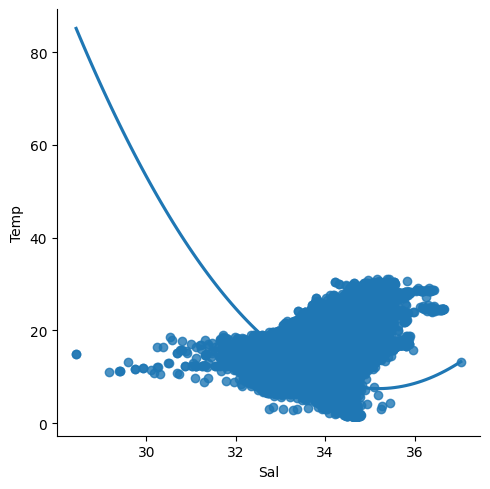

In [4]:
sns.lmplot(x="Sal", y="Temp", data=df_bin, order=2, ci=None)

In [5]:
df_bin.fillna(method="ffill", inplace=True)

/tmp/ipykernel_33/3061261124.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bin.fillna(method="ffill", inplace=True)
/tmp/ipykernel_33/3061261124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin.fillna(method="ffill", inplace=True)


In [6]:
X = np.array(df_bin['Sal']).reshape(-1,1)
Y = np.array(df_bin['Temp']).reshape(-1,1)

df_bin.dropna(inplace=True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

model = LinearRegression()

model.fit(X_train, Y_train)

print(model.score(X_train, Y_train))

0.2048208451600655


/tmp/ipykernel_33/4228741732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin.dropna(inplace=True)


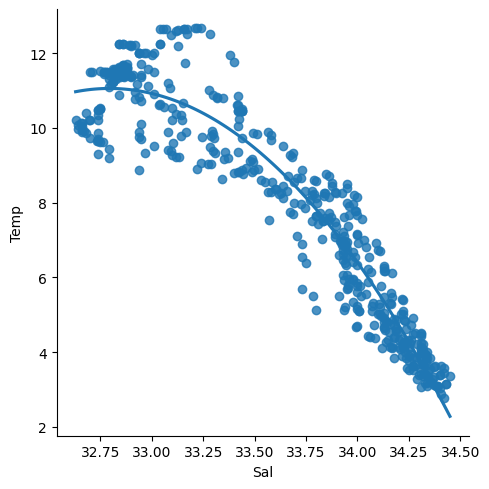

In [7]:
df_bin_500 = df_bin[:][:500]

sns.lmplot(x="Sal", y="Temp", data=df_bin_500, order=2, ci=None)

In [8]:
X = np.array(df_bin_500['Sal']).reshape(-1,1)
Y = np.array(df_bin_500['Temp']).reshape(-1,1)

df_bin_500.dropna(inplace=True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

model = LinearRegression()

model.fit(X_train, Y_train)

print(model.score(X_train, Y_train))

0.8576265419408666


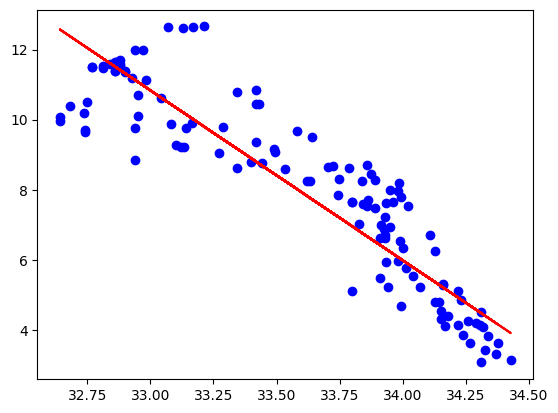

In [9]:
Y_pred = model.predict(X_test)

plt.scatter(X_test, Y_test, color='b')
plt.plot(X_test, Y_pred, color='r')
plt.show()